<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/linear_regression_multiple_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Multiple Features

Implements a Linear Regression model with multiple features.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [175]:
# Define constants and create the training data for the model
NUMBER_OF_SAMPLES = 500
NUMBER_OF_FEATURES = 2
NUMBER_OF_ITERATIONS = 1000

# Create a random starting point for each feature
start = np.random.uniform(low=-10, high=10, size=NUMBER_OF_FEATURES)

# Create a random direction for each feature (positive or negative)
direction = np.random.choice([-1, 1], size=NUMBER_OF_FEATURES)

# Create a random noise term to add to the linearly increasing Y
noise = np.random.normal(loc=0, scale=1, size=NUMBER_OF_SAMPLES)

# Create the X array with linearly increasing and decreasing features
x_train = np.zeros((NUMBER_OF_SAMPLES, NUMBER_OF_FEATURES))
for i in range(NUMBER_OF_FEATURES):
    x_train[:, i] = np.linspace(start[i], start[i] + direction[i]*10, NUMBER_OF_SAMPLES) + np.random.normal(scale=0.1, size=NUMBER_OF_SAMPLES)

# Create the Y array with a linearly increasing trend and some noise
y_train = np.linspace(0, 100, NUMBER_OF_SAMPLES) + noise

# Print the shapes of the X and Y arrays
print("X shape:", x_train.shape)
print("Y shape:", y_train.shape)

# Standardize the input data
x_train_scaled = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
y_train_scaled = (y_train - np.mean(y_train)) / np.std(y_train)

X shape: (500, 2)
Y shape: (500,)


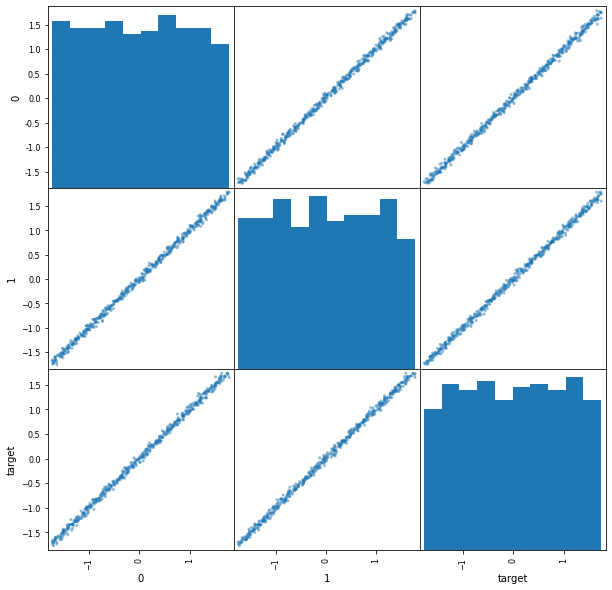

In [176]:
# Create a DataFrame with the standardized features and target variable
df = pd.DataFrame(x_train_scaled)
df['target'] = y_train_scaled

# Create a scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

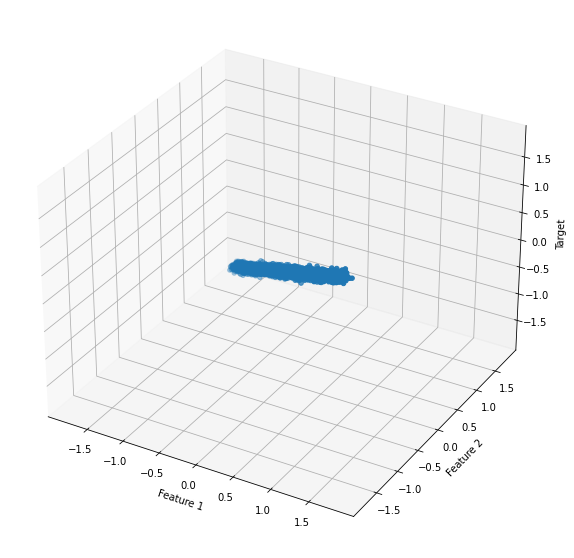

In [165]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_scaled[:,0], x_train_scaled[:,1], y_train_scaled)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [177]:
def mean_squared_error(y_true, y_predicted):
  return np.mean(y_true-y_predicted)**2

def gradient_descent(x, y, intercept, slope, learning_rate, num_iterations):
  cost_function_historic = []
  for i in range(num_iterations):
    y_predicted = np.dot(x,slope) + intercept
    error = y - y_predicted
    intercept -= learning_rate*(-2*np.mean(error))
    slope -= learning_rate*(-2*np.mean(error*x.T))
    cost_function_historic.append((np.sum(error)**2)/(2*NUMBER_OF_SAMPLES))

  return intercept, slope, cost_function_historic 

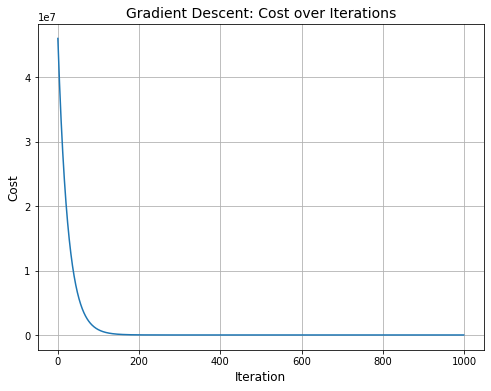

In [179]:
# Call the gradient descent function with the scaled data
slope = np.zeros(NUMBER_OF_FEATURES)
intercept, slope, cost_function_historic = gradient_descent(x_train_scaled, y_train_scaled, np.random.randint(0,1000), slope, 0.01, NUMBER_OF_ITERATIONS)

plt.figure(figsize=(8,6))
plt.plot(cost_function_historic)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Gradient Descent: Cost over Iterations', fontsize=14)
plt.grid(True)
plt.show()
